<a href="https://colab.research.google.com/github/whopriyam/IECSE-ML-Meet-/blob/master/MNIST_F_ANNs_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
###Importing the Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense,Dropout

#Warnings Removal
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

Using TensorFlow backend.


In [0]:
###Importing the Dataset from Keras

from keras.datasets.fashion_mnist import load_data

(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = load_data()

In [0]:
###Label Dictionary

label_dict = {0:'T-shirt/top',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle boot'
}

In [0]:
###Overview of the Imported Data

print("X_train Original Shape:",X_train_orig.shape)
print("Y_train Original Shape:",Y_train_orig.shape)
print("X_test Original Shape:",X_test_orig.shape)
print("Y_test Original Shape:",Y_test_orig.shape)

X_train Original Shape: (60000, 28, 28)
Y_train Original Shape: (60000,)
X_test Original Shape: (10000, 28, 28)
Y_test Original Shape: (10000,)


Sandal


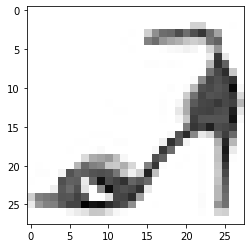

In [0]:
###Visualizing a Training Example

img_index = 2323 #Random Training Example
img = X_train_orig[img_index]
label = Y_train_orig[img_index]

print(label_dict[label])
plt.imshow(img,cmap='Greys')

In [0]:
###Preprocessing the Data

##Flattening the X Arrays(Converting the Images into a Vector)
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1)

##Printing the the Shapes of X Arrays after flattening

print("X_train Flattened Shape:",X_train_flatten.shape)
print("X_test Flattened Shape:",X_test_flatten.shape)

X_train Flattened Shape: (60000, 784)
X_test Flattened Shape: (10000, 784)


In [0]:
##Normalizing the Data
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

In [0]:
###One Hot Encoding

Y_train = keras.utils.to_categorical(Y_train_orig,10)
Y_test = keras.utils.to_categorical(Y_test_orig,10)

##Printing the the Shapes of Y Arrays after One Hot encoding

print("Y_train Shape:",Y_train.shape)
print("Y_test Shape:",Y_test.shape)

Y_train Shape: (60000, 10)
Y_test Shape: (10000, 10)


In [0]:
###Overview of Processed Data

print('X_train Shape:',X_train.shape)
print('Y_train Shape:',Y_train.shape)
print('X_test Shape:',X_test.shape)
print('Y_test Shape:',Y_test.shape)

X_train Shape: (60000, 784)
Y_train Shape: (60000, 10)
X_test Shape: (10000, 784)
Y_test Shape: (10000, 10)


In [0]:
###Creating the Model

#Defining the Input Shape
input_shape = ([784])


model = Sequential() #Allows us to create a model layer by layer


model.add(Dense(64,activation='relu',input_shape=input_shape)) #First Hidden Layer
model.add(Dropout(0.2))

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax')) # Output Layer

In [0]:
###Compiling the Model(Choosing our optimizer,our loss function and our metric for perfromance)

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
###Hyperparameters

epochs = 10
batch_size = 64

In [0]:
###Training the model

history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.7782 - categorical_accuracy: 0.7276 - val_loss: 0.4528 - val_categorical_accuracy: 0.8338
Epoch 2/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.5068 - categorical_accuracy: 0.8207 - val_loss: 0.4095 - val_categorical_accuracy: 0.8515
Epoch 3/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.4560 - categorical_accuracy: 0.8380 - val_loss: 0.3834 - val_categorical_accuracy: 0.8622
Epoch 4/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.4278 - categorical_accuracy: 0.8482 - val_loss: 0.3628 - val_categorical_accuracy: 0.8670
Epoch 5/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.4110 - categorical_accuracy: 0.8549 - val_loss: 0.3635 - val_categorical_accuracy: 0.8683
Epoch 6/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.3963 - categor

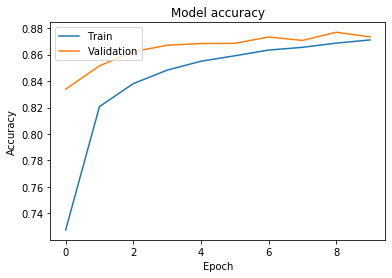

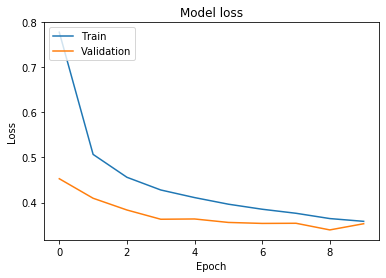

In [0]:
###Plotting the Results

##Accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
###Performance on the Test Set

results = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('test loss, test acc:', results)

10000/10000 [==============================] - 0s 21us/step
test loss, test acc: [0.3804458353281021, 0.8662]


Actual: Sneaker
Prediction: Sandal


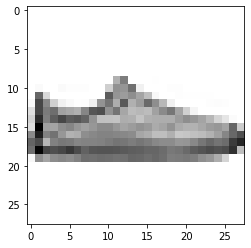

Actual: Coat
Prediction: Pullover


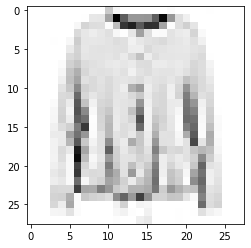

Actual: Shirt
Prediction: Coat


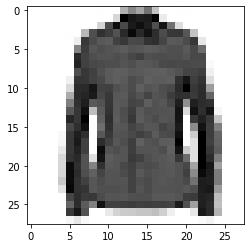

Actual: Dress
Prediction: Coat


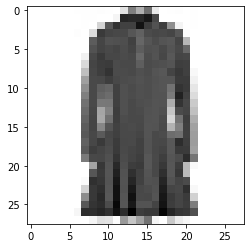

Actual: Shirt
Prediction: T-shirt/top


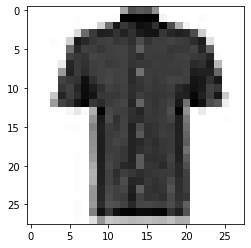

In [0]:
###Checking out the Wrong Predictions

predictions = model.predict(X_test)
wrong_predictions = list()

for ind in range(len(predictions)):
  if np.argmax(predictions[ind,:,]) != np.argmax(Y_test[ind,:]):
    wrong_predictions.append(ind)

for ind in wrong_predictions[:5]:
  img = X_test_orig[ind]
  label = np.argmax(Y_test[ind])
  prediction = np.argmax(predictions[ind])

  print('Actual:',label_dict[label])
  print('Prediction:',label_dict[prediction])
  plt.imshow(img,cmap='Greys')
  plt.show()